In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import importlib
import tools

## 1. Define 3D grid

In [2]:
# positions are adimensional: \tilde(x) = k * x
grid_range = [10, 10, 10]
grid_step = 0.1
ind_med = tuple([int(g / (2*grid_step)) for g in grid_range])

importlib.reload(tools)
x, y, z = tools.define_3Dgrid(grid_range, grid_step)

Maps of size (Nx, Ny, Nz) = (100, 100, 100)


## 2. Define the E and H fields

In [3]:
importlib.reload(tools)
E, H = tools.define_planar_counterwaves(x, y, z, pol='RL')

E and H have shape (3, 100, 100, 100)
E and H have shape (3, 100, 100, 100)
E and H have shape (3, 100, 100, 100)


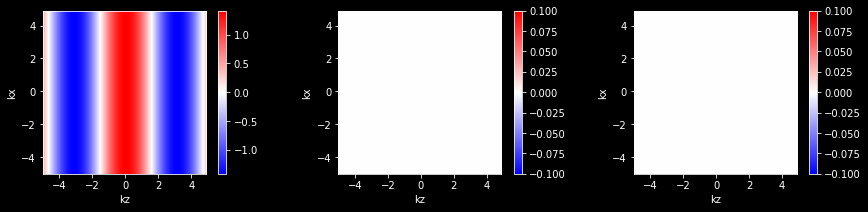

In [4]:
importlib.reload(tools)
tools.plot_vectorfield_zx(E, x, y, z, 'real')
#plot_field_zx(E)

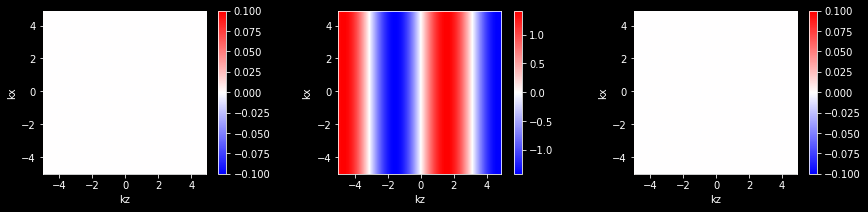

In [5]:
tools.plot_vectorfield_zx(H, x, y, z, 'imag')

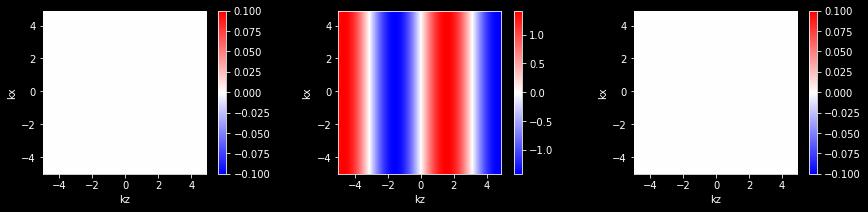

In [6]:
# compare with curl of E
importlib.reload(tools)
H_from_E = -1j * tools.curl(E, grid_step)
tools.plot_vectorfield_zx(H_from_E, x, y, z, 'imag')

## 3. Compute associated quantities

## 3.1 Energy quantities

(3, 100, 100, 100)


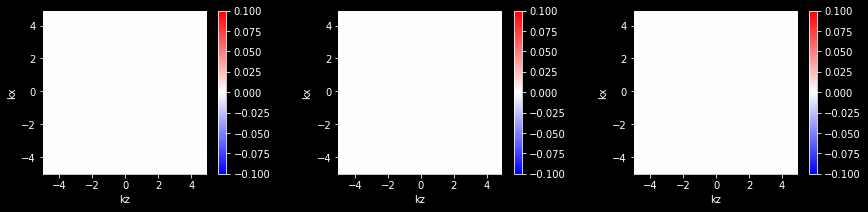

In [36]:
# Poynting vector (normalized by I_0)
PI = 0.5 * np.real(np.cross(E, np.conj(H), axis=0))
print(PI.shape)
tools.plot_vectorfield_zx(PI, x, y, z)

(100, 100, 100)


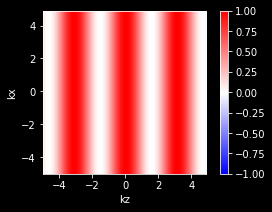

In [37]:
# energy densities (normalized by I_0/c)
W_E = 0.25 * tools.dotprod(E, np.conj(E))
W_H = 0.25 * tools.dotprod(H, np.conj(H))

print(W_E.shape)
tools.plot_scalarfield_zx(W_E, x, y, z)

(100, 100, 100)


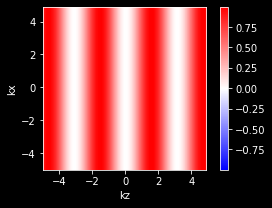

In [38]:
print(W_H.shape)
tools.plot_scalarfield_zx(W_H, x, y, z)

## 3.2 Elliplicity quantities

(3, 100, 100, 100)


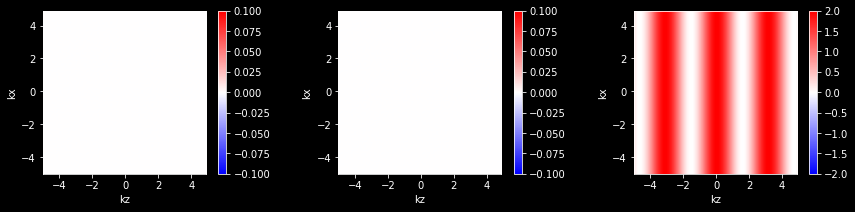

In [39]:
# electric ellipticity (normalized by I_0 / (c*eps) )
Phi_E = -0.5 * np.imag(tools.crossprod(E, np.conj(E)))
print(Phi_E.shape)
tools.plot_vectorfield_zx(Phi_E, x, y, z)

(3, 100, 100, 100)


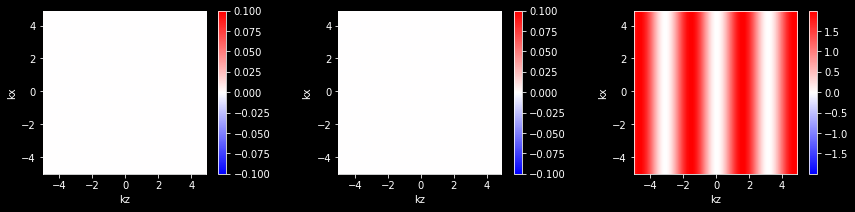

In [40]:
# magnetic ellipticity (normalized by I_0 / (c*mu) )
Phi_H = -0.5 * np.imag(tools.crossprod(H, np.conj(H)))
print(Phi_H.shape)
tools.plot_vectorfield_zx(Phi_H, x, y, z)

## 3.3 Spin and orbital parts of Poynting vector

(3, 100, 100, 100)


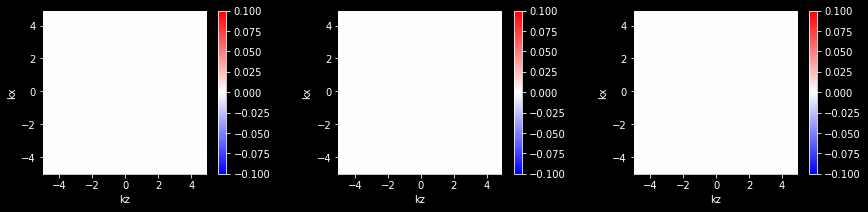

In [41]:
# spin part of the Poynting vector (normalized by I_0)
PI_S_E = 0.5 * tools.curl(Phi_E, grid_step)
print(PI_S_E.shape)
tools.plot_vectorfield_zx(PI_S_E, x, y, z)

(3, 100, 100, 100)


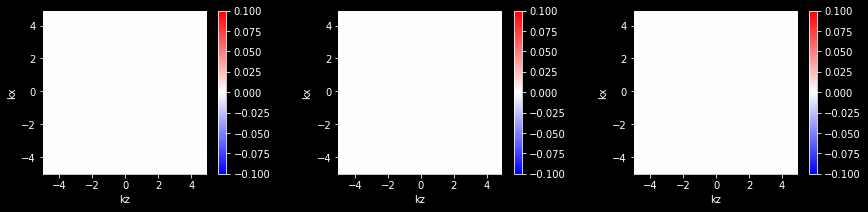

In [42]:
# orbital part of the Poynting vector (normalized by I_0)
PI_O_E = PI - PI_S_E
print(PI_O_E.shape)
tools.plot_vectorfield_zx(PI_O_E, x, y, z)

(3, 100, 100, 100)


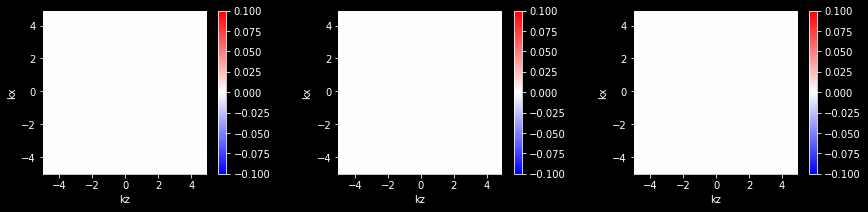

In [43]:
# spin part of the Poynting vector (normalized by I_0)
PI_S_H = 0.5 * tools.curl(Phi_H, grid_step)
print(PI_S_H.shape)
tools.plot_vectorfield_zx(PI_S_H, x, y, z)

(3, 100, 100, 100)


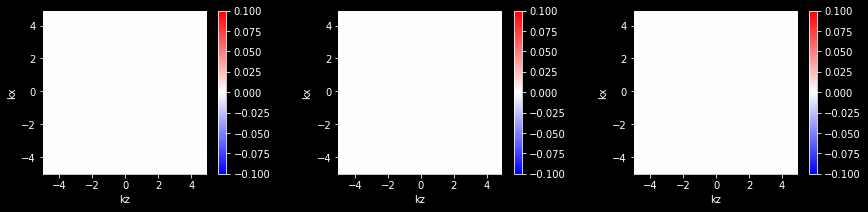

In [44]:
# orbital part of the Poynting vector (normalized by I_0)
PI_O_H = PI - PI_S_H
print(PI_O_H.shape)
tools.plot_vectorfield_zx(PI_O_H, x, y, z)

## 3.4 Chirality quantities

(100, 100, 100)


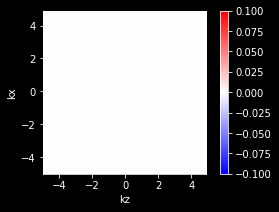

In [45]:
# chirality desnity (normalized by omega*eps*mu*I_0 )
K = 0.5 * np.imag(tools.dotprod(E, np.conj(H)))
print(K.shape)
tools.plot_scalarfield_zx(K, x, y, z)

(3, 100, 100, 100)


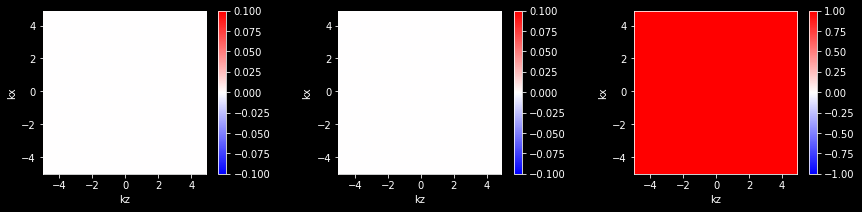

In [46]:
# total ellipticity (normalized by I_0 / (omega*c) )
Phi = 0.5*(Phi_E+Phi_H)
print(Phi.shape)
tools.plot_vectorfield_zx(Phi, x, y, z)

## 4. Optical forces

## 4.1 $\alpha$-related forces

(3, 100, 100, 100)


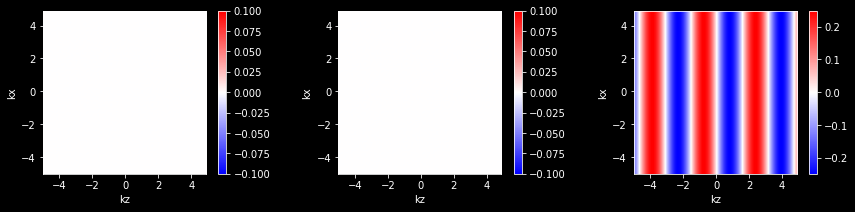

In [47]:
# reactive force, given by the gradient of W_E normalized by omega*eps*mu*I_0
F_alpha_react = 0.25 * tools.grad(W_E, grid_step)
print(F_alpha_react.shape)
tools.plot_vectorfield_zx(F_alpha_react, x, y, z)

(3, 100, 100, 100)


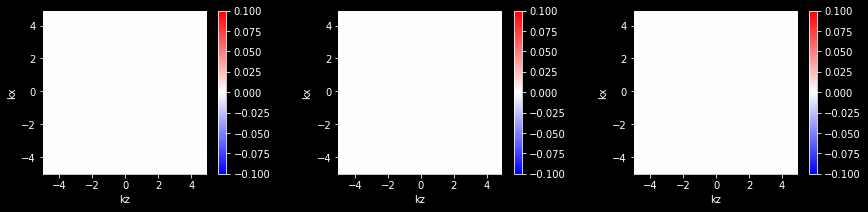

In [48]:
# dissipative force, given by PI_O normalized by I_0
F_alpha_dissip = PI_O_E
print(F_alpha_dissip.shape)
tools.plot_vectorfield_zx(F_alpha_dissip, x, y, z)

## 4.2 $\beta$-related forces

(3, 100, 100, 100)


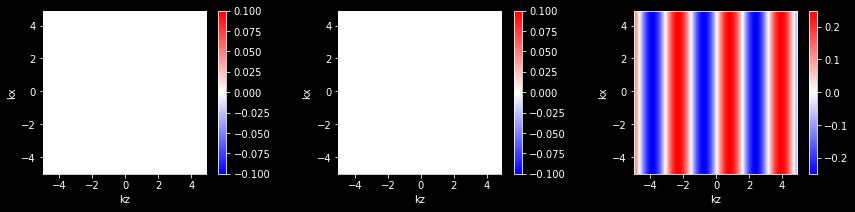

In [49]:
# reactive force, given by the gradient of W_H normalized by omega*eps*mu*I_0
F_beta_react = 0.25 * tools.grad(W_H, grid_step)
print(F_beta_react.shape)
tools.plot_vectorfield_zx(F_beta_react, x, y, z)

(3, 100, 100, 100)


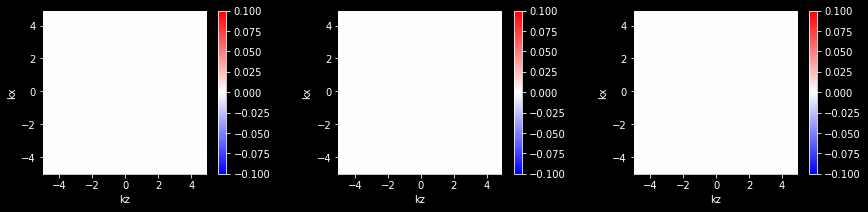

In [50]:
# dissipative force, given by PI_O normalized by I_0
F_beta_dissip = PI_O_H
print(F_beta_dissip.shape)
tools.plot_vectorfield_zx(F_beta_dissip, x, y, z)

## 4.3 $\chi$-related forces

(3, 100, 100, 100)


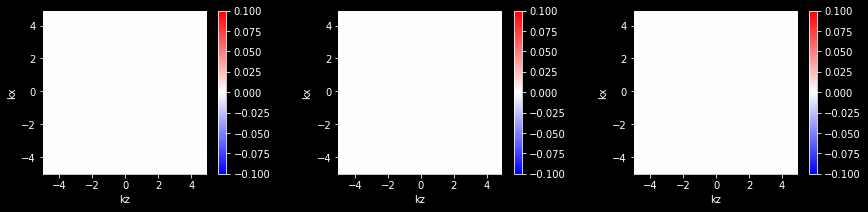

In [51]:
# reactive force, given by the gradient of K normalized by omega*k*eps*mu*I_0
F_chi_react = tools.grad(K, grid_step)
print(F_chi_react.shape)
tools.plot_vectorfield_zx(F_chi_react, x, y, z)

(3, 100, 100, 100)


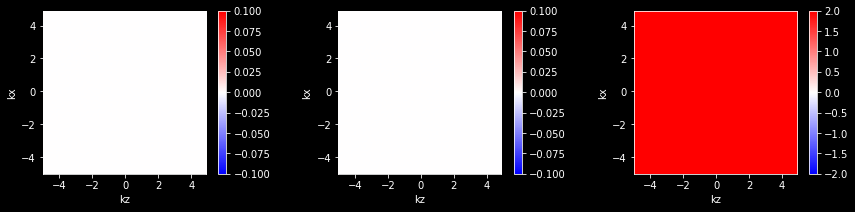

In [52]:
# dissipative force, given by 2*Phi - curl(PI), normalized by k*I_0
F_chi_dissip = 2*Phi - tools.curl(PI, grid_step)
print(F_chi_dissip.shape)
tools.plot_vectorfield_zx(F_chi_dissip, x, y, z)